In [1]:
# Import dependencies  
import pandas as pd  
from splinter import Browser  
from bs4 import BeautifulSoup  
from selenium import webdriver  
from webdriver_manager.chrome import ChromeDriverManager  
from selenium.webdriver.chrome.service import Service  
  
# Install and setup chrome driver  
%pip install selenium webdriver-manager --upgrade  
  
# Set up Splinter with the correct service  
service = Service(ChromeDriverManager().install())  
browser = Browser('chrome', service=service)  
  
print("Setup complete!")  


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Setup complete!


In [3]:
# Visit the Mars Temperature data site  
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'  
browser.visit(url)  
  
# Create BeautifulSoup object  
html = browser.html  
soup = BeautifulSoup(html, 'html.parser')  
  
print("Visited the website and created soup object!")  

Visited the website and created soup object!


In [5]:
# Find the table in the HTML  
table = soup.find('table', class_='table')  
  
# Extract all rows  
rows = table.find_all('tr')  
  
# Lists to store the scraped data  
data = []  
for row in rows[1:]:  # Skip the header row  
    cols = row.find_all('td')  
    row_data = []  
    for col in cols:  
        row_data.append(col.text.strip())  
    data.append(row_data)  
  
print("Table data scraped successfully!")  

Table data scraped successfully!


In [7]:
# Create a Pandas DataFrame with the scraped data  
df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol',   
                                'ls', 'month', 'min_temp', 'pressure'])  
  
# Convert data types  
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  
df['sol'] = pd.to_numeric(df['sol'])  
df['ls'] = pd.to_numeric(df['ls'])  
df['min_temp'] = pd.to_numeric(df['min_temp'])  
df['pressure'] = pd.to_numeric(df['pressure'])  
  
# Display the first few rows and data info  
print("DataFrame head:")  
print(df.head())  
print("\nDataFrame info:")  
print(df.info())  

DataFrame head:
   id terrestrial_date  sol   ls month  min_temp  pressure
0   2       2012-08-16   10  155     6     -75.0     739.0
1  13       2012-08-17   11  156     6     -76.0     740.0
2  24       2012-08-18   12  156     6     -76.0     741.0
3  35       2012-08-19   13  157     6     -74.0     732.0
4  46       2012-08-20   14  157     6     -74.0     740.0

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   object        
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns

In [9]:
# How many months are there on Mars?  
months = df['month'].unique()  
print("Number of months on Mars:", len(months))  
print("Months:", sorted(months))  
  
# How many Martian days' worth of data are there?  
print("\nNumber of Martian days (sols):", len(df))  
  
# What is the average low temperature by month?  
avg_temp_by_month = df.groupby('month')['min_temp'].mean()  
print("\nAverage minimum temperature by month:")  
print(avg_temp_by_month)  
  
# What is the average pressure by month?  
avg_pressure_by_month = df.groupby('month')['pressure'].mean()  
print("\nAverage pressure by month:")  
print(avg_pressure_by_month)  

Number of months on Mars: 12
Months: ['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']

Number of Martian days (sols): 1867

Average minimum temperature by month:
month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

Average pressure by month:
month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


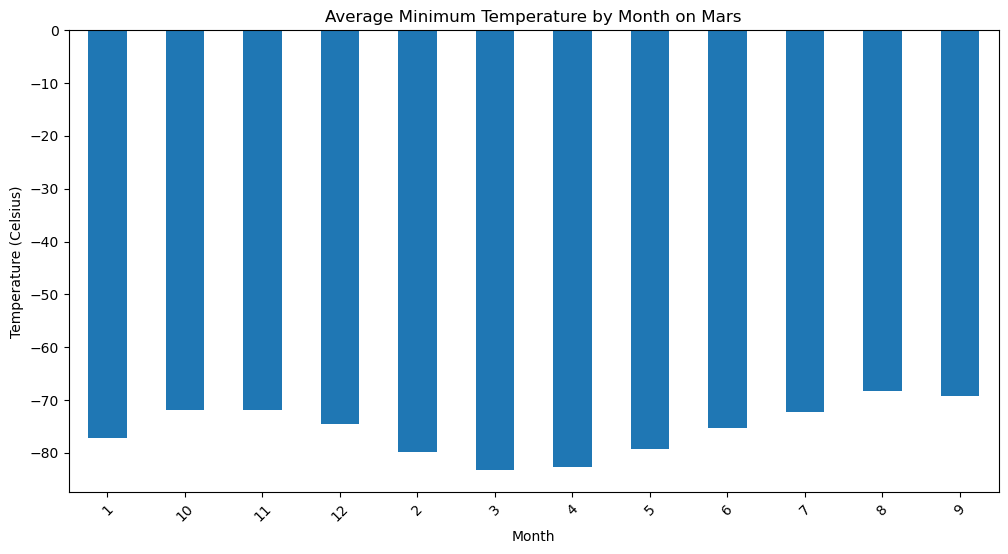

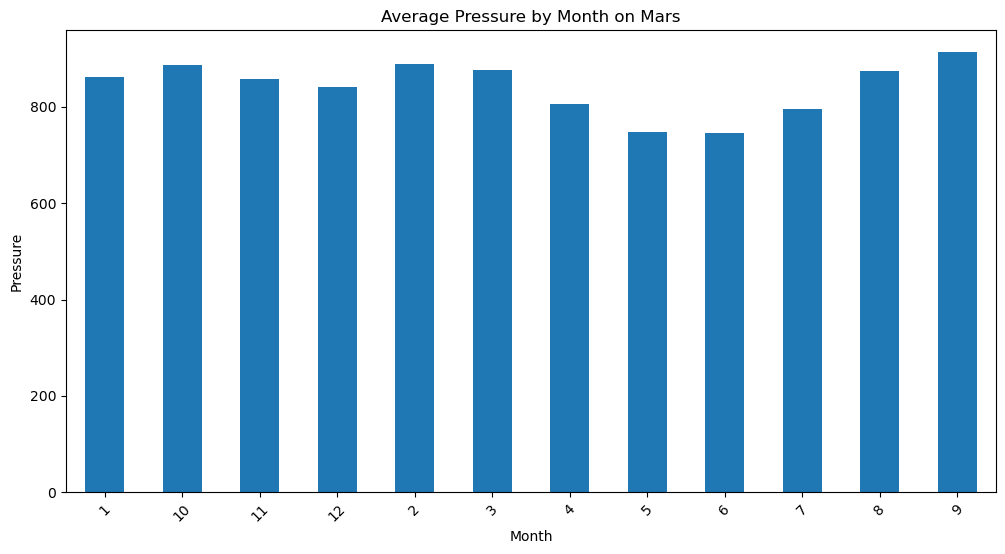

In [11]:
import matplotlib.pyplot as plt  
  
# Plot the average temperature by month  
plt.figure(figsize=(12, 6))  
avg_temp_by_month.plot(kind='bar')  
plt.title('Average Minimum Temperature by Month on Mars')  
plt.xlabel('Month')  
plt.ylabel('Temperature (Celsius)')  
plt.xticks(rotation=45)  
plt.show()  
  
# Plot the average pressure by month  
plt.figure(figsize=(12, 6))  
avg_pressure_by_month.plot(kind='bar')  
plt.title('Average Pressure by Month on Mars')  
plt.xlabel('Month')  
plt.ylabel('Pressure')  
plt.xticks(rotation=45)  
plt.show()  

In [13]:
# Export the DataFrame to a CSV file  
df.to_csv('mars_weather.csv', index=False)  
print("Data exported to mars_weather.csv")  
  
# Close the browser  
browser.quit()  
print("Browser closed!")  

Data exported to mars_weather.csv
Browser closed!
